In [2]:
#What’s the average Loan Amount by Loan Type?

import pandas as pd
df = pd.read_csv(r"C:/Users/joinr/OneDrive/Documents/vedika_loan_data.csv")

In [4]:
df[['Loan Type', 'Loan Amount']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Loan Type    50000 non-null  object
 1   Loan Amount  50000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 781.4+ KB


In [10]:
df_clean = df[['Loan Type', 'Loan Amount']].dropna()
df_clean = df_clean[df_clean['Loan Amount'] > 0]

In [12]:
avg_loan_by_type = df_clean.groupby('Loan Type')['Loan Amount'].mean().reset_index()
avg_loan_by_type.columns = ['Loan Type', 'Average Loan Amount']

In [14]:
avg_loan_by_type = df_clean.groupby('Loan Type')['Loan Amount'].mean().reset_index()
avg_loan_by_type.columns = ['Loan Type', 'Average Loan Amount']

In [16]:
print(avg_loan_by_type)

               Loan Type  Average Loan Amount
0        E-Rickshaw Loan         34962.476746
1             Group Loan         35209.573130
2  Micro Enterprise Loan         34927.194885
3              WASH Loan         35168.742363


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Loan Purpose   50000 non-null  object 
 1   Interest Rate  50000 non-null  float64
dtypes: float64(1), object(1)
memory usage: 781.4+ KB


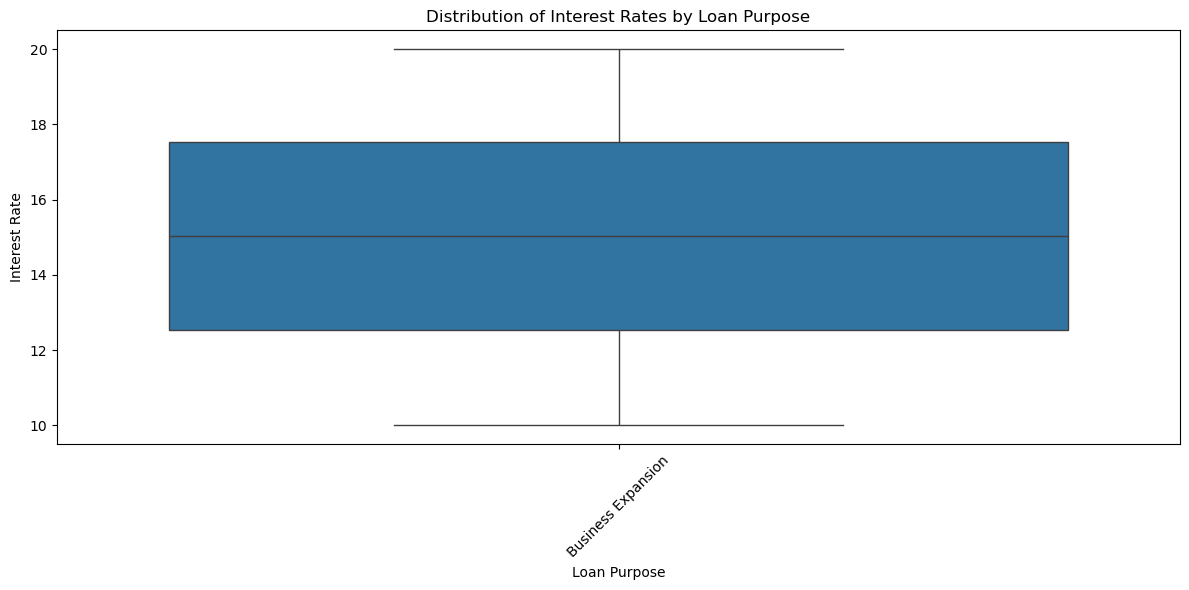

In [63]:
# What's the distribution of Interest Rates across different Loan Purposes?


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r"C:/Users/joinr/OneDrive/Documents/vedika_loan_data.csv")

df[['Loan Purpose', 'Interest Rate']].info()

df_clean = df[['Loan Purpose', 'Interest Rate']].dropna()
df_clean = df_clean[(df_clean['Interest Rate'] > 0) & (df_clean['Interest Rate'] <= 60)]

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_clean, x='Loan Purpose', y='Interest Rate')
plt.xticks(rotation=45)
plt.title('Distribution of Interest Rates by Loan Purpose')
plt.tight_layout()
plt.show()


In [105]:
#Which city/state has the highest total loan disbursement value?
df.columns = df.columns.str.strip()

In [107]:
df[['City', 'Loan Amount']].dropna().query("`Loan Amount` > 0") \
  .groupby('City')['Loan Amount'].sum().sort_values(ascending=False)

City
Silchar        87820449
Udaipur        86313460
Kolkata        86107543
Varanasi       85746157
Kanpur         84990092
Ranchi         84541972
Dharmanagar    84512489
Guwahati       84042270
Gaya           83751340
Lucknow        83578651
Muzaffarpur    83550657
Bhubaneswar    83518332
Dhanbad        82856598
Rourkela       82785147
Jamshedpur     82658786
Cuttack        82398605
Asansol        82373469
Siliguri       81581040
Agartala       80192030
Dibrugarh      80018578
Patna          79930122
Name: Loan Amount, dtype: int64

In [66]:
#Which job titles have the highest average EMI?

import pandas as pd
df = pd.read_csv(r"C:/Users/joinr/OneDrive/Documents/vedika_loan_data.csv")

In [49]:
df[['Job Title', 'EMI Amount']].head()

,Job Title,EMI Amount
0,Owner,1976.69
1,Worker,1288.16
2,Worker,674.48
3,Worker,1025.94
4,Worker,3041.18


In [51]:
df_clean = df[['Job Title', 'EMI Amount']].dropna()
df_clean = df_clean[df_clean['EMI Amount'] > 0]

In [53]:
job_emi_avg = df_clean.groupby('Job Title')['EMI Amount'].mean().reset_index()

In [55]:
job_emi_avg = job_emi_avg.sort_values(by='EMI Amount', ascending=False)

In [57]:
print(job_emi_avg.head(10)) 

  Job Title   EMI Amount
1    Worker  1828.531448
0     Owner  1804.481654


In [59]:
df[['Job Title', 'EMI Amount']].dropna().query("`EMI Amount` > 0").groupby('Job Title')['EMI Amount'].mean().sort_values(ascending=False)


Job Title
Worker    1828.531448
Owner     1804.481654
Name: EMI Amount, dtype: float64

In [70]:
#What's the average CIBIL Score across age groups?

In [87]:
pd.cut(df.dropna(subset=['Age', 'CIBIL Score']) \
        .query("Age >= 18 & `CIBIL Score` > 0")['Age'], 
       bins=[18,30,45,60,100], labels=['18–30','31–45','46–60','60+']) \
    .to_frame(name='Age Group') \
    .join(df['CIBIL Score']) \
    .groupby('Age Group', observed=True)['CIBIL Score'].mean()


Age Group
18–30    700.198291
31–45    700.830139
46–60    699.720620
60+      700.654344
Name: CIBIL Score, dtype: float64

In [89]:
# What is the monthly trend in number of loans disbursed in last 12 months?

df[pd.to_datetime(df['Loan Disbursal Date'], errors='coerce') >= pd.Timestamp.today() - pd.DateOffset(months=12)] \
    .assign(DisbursalMonth = pd.to_datetime(df['Loan Disbursal Date'], errors='coerce').dt.to_period('M')) \
    .groupby('DisbursalMonth').size()


DisbursalMonth
2024-05    1575
2024-06    1983
2024-07    2130
2024-08    2141
2024-09    2003
2024-10    2115
2024-11    2042
2024-12    2117
Freq: M, dtype: int64

In [91]:
# Which education level group borrows the most on average?
df[['Education Level', 'Loan Amount']].dropna().query("`Loan Amount` > 0") \
  .groupby('Education Level')['Loan Amount'].mean().sort_values(ascending=False)

Education Level
Primary          35083.065351
Post-Graduate    35077.078712
Graduate         34997.783201
Secondary        34907.584533
Name: Loan Amount, dtype: float64

In [95]:
#How many customers have zero dependents and still defaulted?

df.dropna(subset=['Number of Dependents', 'Loan Status']) \
  .query("`Number of Dependents` == 0 and `Loan Status`.str.lower() == 'default'", engine='python') \
  .shape[0]

0

In [97]:
#What is the relationship between loan tenure and EMI amount?

df[['Loan Tenure', 'EMI Amount']].dropna().query("`Loan Tenure` > 0 & `EMI Amount` > 0").corr().iloc[0,1]


-0.5591088627224606

In [99]:
#What is the average Loan-to-Income ratio segmented by Employment Type?
df[['Employment Type', 'Loan-to-Income Ratio']].dropna().query("`Loan-to-Income Ratio` > 0") \
  .groupby('Employment Type')['Loan-to-Income Ratio'].mean().sort_values(ascending=False)


Employment Type
Business Owner       0.451449
Self-Employed        0.449457
Daily Wage Worker    0.448963
Salaried             0.448809
Name: Loan-to-Income Ratio, dtype: float64